In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
# imgs = []
# labels = []
# size = (128, 128)


In [0]:

!ls

gdrive	sample_data


In [0]:
import os 
root_path = 'gdrive/My Drive/' 
path = 'gdrive/My Drive/256_ObjectCategories'
categories = sorted(os.listdir(path))
ncategories = len(categories)
ncategories

257

In [0]:
!ls

042_0001.jpg  042_0019.jpg  042_0037.jpg  042_0055.jpg	042_0073.jpg
042_0002.jpg  042_0020.jpg  042_0038.jpg  042_0056.jpg	042_0074.jpg
042_0003.jpg  042_0021.jpg  042_0039.jpg  042_0057.jpg	042_0075.jpg
042_0004.jpg  042_0022.jpg  042_0040.jpg  042_0058.jpg	042_0076.jpg
042_0005.jpg  042_0023.jpg  042_0041.jpg  042_0059.jpg	042_0077.jpg
042_0006.jpg  042_0024.jpg  042_0042.jpg  042_0060.jpg	042_0078.jpg
042_0007.jpg  042_0025.jpg  042_0043.jpg  042_0061.jpg	042_0079.jpg
042_0008.jpg  042_0026.jpg  042_0044.jpg  042_0062.jpg	042_0080.jpg
042_0009.jpg  042_0027.jpg  042_0045.jpg  042_0063.jpg	042_0081.jpg
042_0010.jpg  042_0028.jpg  042_0046.jpg  042_0064.jpg	042_0082.jpg
042_0011.jpg  042_0029.jpg  042_0047.jpg  042_0065.jpg	042_0083.jpg
042_0012.jpg  042_0030.jpg  042_0048.jpg  042_0066.jpg	042_0084.jpg
042_0013.jpg  042_0031.jpg  042_0049.jpg  042_0067.jpg	042_0085.jpg
042_0014.jpg  042_0032.jpg  042_0050.jpg  042_0068.jpg	042_0086.jpg
042_0015.jpg  042_0033.jpg  042_0051.jpg  042_00

In [0]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.constraints import maxnorm
from keras.optimizers import SGD
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras import initializers
from keras import backend as K
K.set_image_dim_ordering('tf')

import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import tensorflow as tf

In [0]:
# for i, category in enumerate(categories):
# i = 0
# for f in os.listdir(path + "/" + categories[0]):
#     fullpath = os.path.join(path + "/" + categories[0], f)
#     print(fullpath)
#     img = Image.open(fullpath)
#     img = np.asarray(img.resize(size, Image.ANTIALIAS))
#     if img.shape == (128,128,3): 
#       imgs.append(np.array(img))
#       label_curr = i
#       labels.append(label_curr)

In [0]:
# imgs_temp = [imgs, labels]
# np.save(root_path + '/' + 'y', labels)



In [0]:
x = np.load('gdrive/My Drive/x.npy', mmap_mode=None, allow_pickle=True, fix_imports=True, encoding='ASCII')
y = np.load('gdrive/My Drive/y.npy', mmap_mode=None, allow_pickle=True, fix_imports=True, encoding='ASCII')
plt.imshow(x[96])


In [0]:

os.chdir('gdrive/My Drive')

In [0]:
# for i, category in enumerate(categories):
#   for f in os.listdir(path + "/" + category):
#       fullpath = os.path.join(path + "/" + category, f)
#       print(fullpath)
#       img = Image.open(fullpath)
#       img = np.asarray(img.resize(size))
#       if img.shape == (128,128,3): 
#         imgs.append(np.array(img))
#         label_curr = i
#         labels.append(label_curr)

In [0]:
# import time
# for k in range(100,200):
#   plt.imshow(x[k])
#   plt.show()
#   plt.clf() #will make the plot window empty
#   plt.close()
#   print(y[k])
#   time.sleep(5)

In [0]:
seed = 7
np.random.seed(seed)
import pandas as pd
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)
X_train = np.stack(X_train, axis=0)
y_train = np.stack(y_train, axis=0)
X_test = np.stack(X_test, axis=0)
y_test = np.stack(y_test, axis=0)
print ("Num train_imgs: %d" % (len(X_train)))
print ("Num test_imgs: %d" % (len(X_test)))
# # one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)



Num train_imgs: 24251
Num test_imgs: 6063


In [0]:
print (y_train[0])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


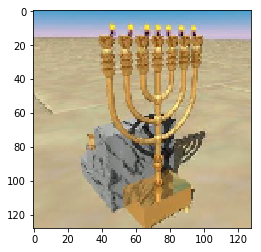

In [0]:
plt.imshow(X_train[0])

In [0]:
# reshape data to fit model
X_train = X_train.reshape(24251,128,128,3)
X_test = X_test.reshape(6063,128,128,3)
# X_train = X_train.transpose(0, 3, 1, 2)
# X_test = X_test.transpose(0, 3, 1, 2)
X_train.shape
y_train.shape
# X_test.shape

(24251, 257)

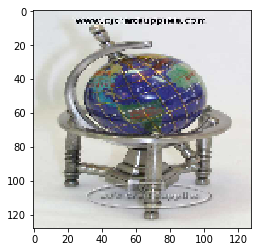

In [0]:
# count = 0
# for j in range(len(y_train[13])):
#   if y_train[13][j] == 1.0:
#     print(j)
#   count+=1
plt.imshow(X_train[13])

In [0]:
# import gc
# gc.collect()

In [0]:

# model = Sequential()
# model.add(Flatten(input_shape=(128,128,3)))
# model.add(Dropout(0.2))
# model.add(Dense(257, activation='relu'))
# model.add(Dropout(0.5))
# #model.add(Flatten())
# model.add(Dense(257, activation='softmax'))

# model.compile(optimizer='rmsprop',
#               loss='binary_crossentropy',
#               metrics=['accuracy'])

# model.fit(X_train, y_train,
#           epochs=1,
#           batch_size=32,
#           validation_data=(X_test, y_test))

In [0]:
def build(width, height, depth, classes, init="he_normal"):
		# initialize the model along with the input shape to be
		# "channels last" and the channels dimension itself
		model = Sequential()
		inputShape = (height, width, depth)
		chanDim = -1

		# if we are using "channels first", update the input shape
		# and channels dimension
		if K.image_data_format() == "channels_first":
			inputShape = (depth, height, width)
			chanDim = 1

		# our first CONV layer will learn a total of 16 filters, each
		# Of which are 7x7 -- we'll then apply 2x2 strides to reduce
		# the spatial dimensions of the volume
		model.add(Conv2D(16, (7, 7), strides=(2, 2), padding="valid",
			kernel_initializer=init,
			input_shape=inputShape))

		# here we stack two CONV layers on top of each other where
		# each layerswill learn a total of 32 (3x3) filters
		model.add(Conv2D(32, (3, 3), padding="same",
			kernel_initializer=init))
		model.add(Activation("relu"))
		model.add(BatchNormalization(axis=chanDim))
		model.add(Conv2D(32, (3, 3), strides=(2, 2), padding="same",
			kernel_initializer=init))
		model.add(Activation("relu"))
		model.add(BatchNormalization(axis=chanDim))
		model.add(Dropout(0.25))

		# stack two more CONV layers, keeping the size of each filter
		# as 3x3 but increasing to 64 total learned filters
		model.add(Conv2D(64, (3, 3), padding="same",
			kernel_initializer=init))
		model.add(Activation("relu"))
		model.add(BatchNormalization(axis=chanDim))
		model.add(Conv2D(64, (3, 3), strides=(2, 2), padding="same",
			kernel_initializer=init))
		model.add(Activation("relu"))
		model.add(BatchNormalization(axis=chanDim))
		model.add(Dropout(0.25))

		# increase the number of filters again, this time to 128
		model.add(Conv2D(128, (3, 3), padding="same",
			kernel_initializer=init))
		model.add(Activation("relu"))
		model.add(BatchNormalization(axis=chanDim))
		model.add(Conv2D(128, (3, 3), strides=(2, 2), padding="same",
			kernel_initializer=init))
		model.add(Activation("relu"))
		model.add(BatchNormalization(axis=chanDim))
		model.add(Dropout(0.25))

		# fully-connected layer
		model.add(Flatten())
		model.add(Dense(512))
		model.add(Activation("relu"))
		model.add(BatchNormalization())
		model.add(Dropout(0.5))

		# softmax classifier
		model.add(Dense(classes))
		model.add(Activation("softmax"))

		# return the constructed network architecture
		return model


In [0]:
from keras.layers import Dense, Conv2D, Flatten, Activation, BatchNormalization
model = build(128,128,3,257)

In [0]:
import keras_metrics
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy', keras_metrics.precision(), keras_metrics.recall()])
#train the model
hist = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=30)

Train on 24251 samples, validate on 6063 samples
Epoch 1/30
24251/24251 [==============================] - 22s 925us/step - loss: 5.2747 - acc: 0.0971 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 5.0700 - val_acc: 0.1230 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/30
24251/24251 [==============================] - 21s 868us/step - loss: 4.3017 - acc: 0.1775 - precision: 0.6000 - recall: 0.0187 - val_loss: 4.3858 - val_acc: 0.1587 - val_precision: 1.0000 - val_recall: 0.0294
Epoch 3/30
24251/24251 [==============================] - 21s 876us/step - loss: 3.7076 - acc: 0.2436 - precision: 0.6667 - recall: 0.0750 - val_loss: 3.7752 - val_acc: 0.2443 - val_precision: 1.0000 - val_recall: 0.0882
Epoch 4/30
24251/24251 [==============================] - 21s 852us/step - loss: 3.2304 - acc: 0.3151 - precision: 0.7667 - recall: 0.1437 - val_loss: 3.5962 - val_acc: 0.2797 - val_precision: 1.0000 - val_recall: 0.2353
Epoch 5/30
24251/24251 [===========================

In [0]:
os.chdir('')


In [0]:
model.save_weights('ML-Project-NewModel-Caltech256-Weights')

In [0]:
model.save('Caltech256-NewModel.h5')

In [0]:
!ls


 256_ObjectCategories
 app
 array.npy
 buterfly-test.jpg
 Caltech256-Model
 Caltech256-NewModel.h5
'Colab Notebooks'
 Copy_of_ML.ipynb
'Final Orientation Day Plan  2016 -  UG.docx'
'Getting started.pdf'
 kaggle
 lenet.py
 ML_Project.ipynb
 ML-Project-NewModel-Caltech256-Weights
 NewModel-accuracy.png
 NewModel-better-labeling-accuracy.png
 NewModel-better-labeling-loss.png
 NewModel-better-labeling-precision.png
 NewModel-better-labeling-recall.png
 NewModel-loss.png
 NewModel-plot.png
 prediction-img.jpg
 ProjectPresentation.gslides
 pyimagesearch
 resized_data.npy
 resized_data.txt
 Transfomation+Generator.gslides
 Untitled0.ipynb
'Untitled presentation.gslides'
 x.npy
 y.npy


In [0]:

model.load_weights('ML-Project-NewModel-Caltech256-Weights')

In [0]:
import keras
dependencies = {
    'binary_precision': keras_metrics.precision(),
    'binary_recall': keras_metrics.recall()
}
new_model = keras.models.load_model('Caltech256-NewModel.h5', custom_objects=dependencies)
new_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 61, 61, 16)        2368      
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 61, 61, 32)        4640      
_________________________________________________________________
activation_9 (Activation)    (None, 61, 61, 32)        0         
_________________________________________________________________
batch_normalization_8 (Batch (None, 61, 61, 32)        128       
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 31, 31, 32)        9248      
_________________________________________________________________
activation_10 (Activation)   (None, 31, 31, 32)        0         
_________________________________________________________________
batch_normalization_9 (Batch (None, 31, 31, 32)        128       
__________

In [0]:
loss, acc, prec, recall = new_model.evaluate(X_test, y_test)
print("Restored model, accuracy: {:5.2f}%".format(100*acc))
print("Restored model, loss: {:5.2f}".format(loss))
print("Restored model, precision: {:5.2f}%".format(100*prec))
print("Restored model, recall: {:5.2f}%".format(100*recall))

6063/6063 [==============================] - 2s 292us/step
Restored model, accuracy: 32.06%
Restored model, loss:  5.15
Restored model, precision: 81.08%
Restored model, recall: 88.24%


In [0]:
os.chdir('My Drive')
!ls

 256_ObjectCategories
 app
 array.npy
 Caltech256-Model
 Caltech256-NewModel.h5
'Colab Notebooks'
 Copy_of_ML.ipynb
'Final Orientation Day Plan  2016 -  UG.docx'
'Getting started.pdf'
 kaggle
 lenet.py
 ML_Project.ipynb
 ML-Project-NewModel-Caltech256-Weights
 prediction-img.jpg
 ProjectPresentation.gslides
 pyimagesearch
 resized_data.npy
 resized_data.txt
 Transfomation+Generator.gslides
 Untitled0.ipynb
'Untitled presentation.gslides'
 x.npy
 y.npy


In [0]:
img = Image.open("prediction-img.jpg")
img = np.asarray(img.resize((128,128), Image.ANTIALIAS))
prediction = model.predict(img.reshape(1,128,128,3))

In [0]:
os.chdir('001.ak47')

In [0]:
!ls

001_0001.jpg  001_0021.jpg  001_0041.jpg  001_0061.jpg	001_0081.jpg
001_0002.jpg  001_0022.jpg  001_0042.jpg  001_0062.jpg	001_0082.jpg
001_0003.jpg  001_0023.jpg  001_0043.jpg  001_0063.jpg	001_0083.jpg
001_0004.jpg  001_0024.jpg  001_0044.jpg  001_0064.jpg	001_0084.jpg
001_0005.jpg  001_0025.jpg  001_0045.jpg  001_0065.jpg	001_0085.jpg
001_0006.jpg  001_0026.jpg  001_0046.jpg  001_0066.jpg	001_0086.jpg
001_0007.jpg  001_0027.jpg  001_0047.jpg  001_0067.jpg	001_0087.jpg
001_0008.jpg  001_0028.jpg  001_0048.jpg  001_0068.jpg	001_0088.jpg
001_0009.jpg  001_0029.jpg  001_0049.jpg  001_0069.jpg	001_0089.jpg
001_0010.jpg  001_0030.jpg  001_0050.jpg  001_0070.jpg	001_0090.jpg
001_0011.jpg  001_0031.jpg  001_0051.jpg  001_0071.jpg	001_0091.jpg
001_0012.jpg  001_0032.jpg  001_0052.jpg  001_0072.jpg	001_0092.jpg
001_0013.jpg  001_0033.jpg  001_0053.jpg  001_0073.jpg	001_0093.jpg
001_0014.jpg  001_0034.jpg  001_0054.jpg  001_0074.jpg	001_0094.jpg
001_0015.jpg  001_0035.jpg  001_0055.jpg  001_00

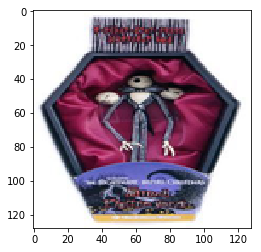

In [0]:
plt.imshow(img)

In [0]:
os.chdir('012.binoculars')
!ls

012_0001.jpg  012_0045.jpg  012_0089.jpg  012_0133.jpg	012_0177.jpg
012_0002.jpg  012_0046.jpg  012_0090.jpg  012_0134.jpg	012_0178.jpg
012_0003.jpg  012_0047.jpg  012_0091.jpg  012_0135.jpg	012_0179.jpg
012_0004.jpg  012_0048.jpg  012_0092.jpg  012_0136.jpg	012_0180.jpg
012_0005.jpg  012_0049.jpg  012_0093.jpg  012_0137.jpg	012_0181.jpg
012_0006.jpg  012_0050.jpg  012_0094.jpg  012_0138.jpg	012_0182.jpg
012_0007.jpg  012_0051.jpg  012_0095.jpg  012_0139.jpg	012_0183.jpg
012_0008.jpg  012_0052.jpg  012_0096.jpg  012_0140.jpg	012_0184.jpg
012_0009.jpg  012_0053.jpg  012_0097.jpg  012_0141.jpg	012_0185.jpg
012_0010.jpg  012_0054.jpg  012_0098.jpg  012_0142.jpg	012_0186.jpg
012_0011.jpg  012_0055.jpg  012_0099.jpg  012_0143.jpg	012_0187.jpg
012_0012.jpg  012_0056.jpg  012_0100.jpg  012_0144.jpg	012_0188.jpg
012_0013.jpg  012_0057.jpg  012_0101.jpg  012_0145.jpg	012_0189.jpg
012_0014.jpg  012_0058.jpg  012_0102.jpg  012_0146.jpg	012_0190.jpg
012_0015.jpg  012_0059.jpg  012_0103.jpg  012_01

In [0]:

print (prediction)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [0]:
!ls

 256_ObjectCategories
 app
 array.npy
 buterfly-test.jpg
 Caltech256-Model
 Caltech256-NewModel.h5
'Colab Notebooks'
 Copy_of_ML.ipynb
'Final Orientation Day Plan  2016 -  UG.docx'
'Getting started.pdf'
 kaggle
 lenet.py
 ML_Project.ipynb
 ML-Project-NewModel-Caltech256-Weights
 NewModel-accuracy.png
 NewModel-better-labeling-accuracy.png
 NewModel-better-labeling-loss.png
 NewModel-loss.png
 NewModel-plot.png
 prediction-img.jpg
 ProjectPresentation.gslides
 pyimagesearch
 resized_data.npy
 resized_data.txt
 Transfomation+Generator.gslides
 Untitled0.ipynb
'Untitled presentation.gslides'
 x.npy
 y.npy


In [0]:
img = Image.open("256_ObjectCategories/001.ak47/001_0056.jpg")
img = np.asarray(img.resize((128,128), Image.ANTIALIAS))
prediction = model.predict(img.reshape(1,128,128,3))


In [0]:
img = Image.open("256_ObjectCategories/031.car-tire/031_0064.jpg")
img = np.asarray(img.resize((128,128), Image.ANTIALIAS))
prediction = model.predict(img.reshape(1,128,128,3))


In [0]:
sorting = (-prediction).argsort()

# getting the top 2 predictions
sorted_ = sorting[0][:2]

for value in sorted_:
    # you can get your classes from the encoder(your_classes = encoder.classes_) 
    # or from a dictionary that you created before.
    # And then we access them with the predicted index.
    print (value)
    predicted_label = categories[value]
    predicted_refined_label = predicted_label.split('.')
    # just some rounding steps
    prob = (prediction[0][value]) * 100
    prob = "%.2f" % round(prob,2)
    print("I have %s%% sure that it belongs to %s." % (prob, predicted_refined_label[1]))

0
I have 100.00% sure that it belongs to ak47.
165
I have 0.00% sure that it belongs to praying-mantis.


In [0]:
img = Image.open("012_0138.jpg")
img = np.asarray(img.resize((128,128), Image.ANTIALIAS))
prediction = model.predict(img.reshape(1,128,128,3))


In [0]:
os.chdir('../../')
!ls

 256_ObjectCategories
 app
 array.npy
 Caltech256-Model
 Caltech256-NewModel.h5
'Colab Notebooks'
 Copy_of_ML.ipynb
'Final Orientation Day Plan  2016 -  UG.docx'
'Getting started.pdf'
 kaggle
 lenet.py
 ML_Project.ipynb
 ML-Project-NewModel-Caltech256-Weights
 prediction-img.jpg
 ProjectPresentation.gslides
 pyimagesearch
 resized_data.npy
 resized_data.txt
 Transfomation+Generator.gslides
 Untitled0.ipynb
'Untitled presentation.gslides'
 x.npy
 y.npy


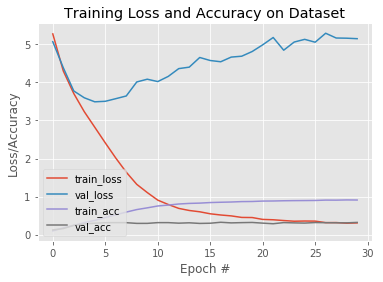

In [0]:
N = 30
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), hist.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), hist.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), hist.history["acc"], label="train_acc")
plt.plot(np.arange(0, N), hist.history["val_acc"], label="val_acc")
plt.title("Training Loss and Accuracy on Dataset")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
plt.savefig("NewModel-plot.png")

Accuracy: 32.06%


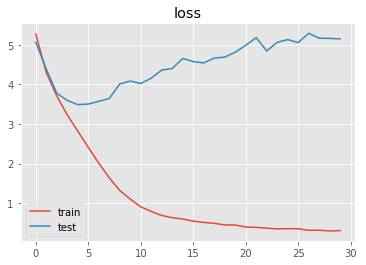

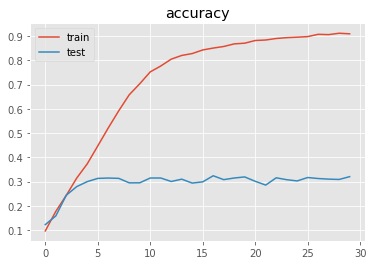

In [0]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.legend(['train','test'])
plt.title('loss')
plt.savefig("NewModel-loss.png",dpi=300,format="png")
plt.figure()
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.legend(['train','test'])
plt.title('accuracy')
plt.savefig("NewModel-accuracy.png",dpi=300,format="png")

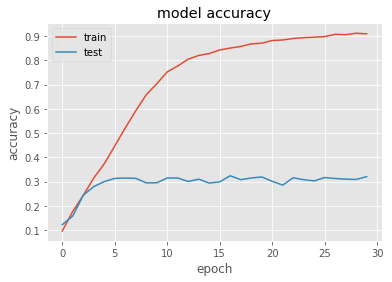

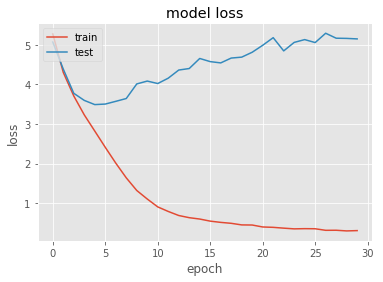

<Figure size 432x288 with 0 Axes>

In [0]:
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.savefig("NewModel-better-labeling-accuracy.png",dpi=300,format="png")
# summarize history for loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.savefig("NewModel-better-labeling-loss.png",dpi=300,format="png")

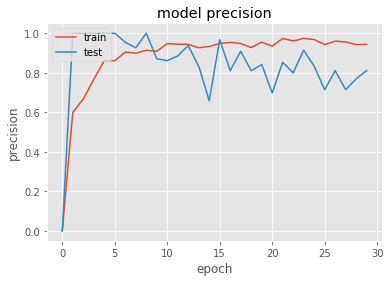

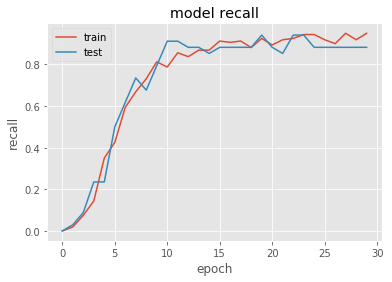

<Figure size 432x288 with 0 Axes>

In [0]:
plt.plot(hist.history['precision'])
plt.plot(hist.history['val_precision'])
plt.title('model precision')
plt.ylabel('precision')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.savefig("NewModel-better-labeling-precision.png",dpi=300,format="png")
# summarize history for loss
plt.plot(hist.history['recall'])
plt.plot(hist.history['val_recall'])
plt.title('model recall')
plt.ylabel('recall')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.savefig("NewModel-better-labeling-recall.png",dpi=300,format="png")

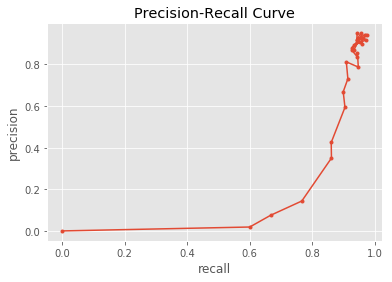

In [0]:
plt.title('Precision-Recall Curve')
plt.ylabel('precision')
plt.xlabel('recall')
plt.plot(hist.history['precision'] , hist.history['recall'], marker='.')

In [0]:
n_folds = 10
cv_scores, model_history = list(), list()
for _ in range(n_folds):
    # split data
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.10, random_state = np.random.randint(1,1000, 1)[0])
    # evaluate model
    X_train = np.stack(X_train, axis=0)
    y_train = np.stack(y_train, axis=0)
    X_test = np.stack(X_test, axis=0)
    y_test = np.stack(y_test, axis=0)
    y_train = np_utils.to_categorical(y_train)
    y_test = np_utils.to_categorical(y_test)
    model1 = build(128,128,3,257)
    model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    model1.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=32, verbose=0)
    _ , val_acc = model1.evaluate(X_test, y_test, verbose=1)
    print('>%.3f' % val_acc)
    cv_scores.append(val_acc)
    model_history.append(model1)
    
print('Estimated Accuracy %.3f (%.3f)' % (np.mean(cv_scores), np.std(cv_scores)))

3032/3032 [==============================] - 1s 291us/step
>0.343
3032/3032 [==============================] - 1s 283us/step
>0.336
3032/3032 [==============================] - 1s 283us/step
>0.334
3032/3032 [==============================] - 1s 276us/step
>0.340
3032/3032 [==============================] - 1s 332us/step
>0.332
3032/3032 [==============================] - 1s 299us/step
>0.349
3032/3032 [==============================] - 1s 312us/step
>0.327
3032/3032 [==============================] - 1s 291us/step
>0.336
3032/3032 [==============================] - 1s 295us/step
>0.320
3032/3032 [==============================] - 1s 295us/step
>0.343
Estimated Accuracy 0.336 (0.008)


### CONCLUSION
